<a href="https://colab.research.google.com/github/ahnafzaki12/RFM-Kmeans-Clustering---A25-CS329/blob/main/RFM_%26_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selamat Datang

*   Tahta
*   Lingga



# Import Library

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1V2IdrRQ8XQmJlzb2PAlJw0ziJQg-13QW')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [ ]:
df['Description'] = df['Description'].fillna("Tidak ada deskripsi")
df['Customer ID'] = df['Customer ID'].fillna("Tidak diketahui")
print(df.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [ ]:
print(df.duplicated().sum())

34335


In [ ]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [ ]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1007914,1007914,1007914,1.007914e+06,1007914,1.007914e+06,1007914,1007914
unique,40078,4917,5399,NaN,NaN,NaN,5879,43
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,Tidak diketahui,United Kingdom
freq,1114,5511,5601,NaN,NaN,NaN,228489,926039
mean,NaN,NaN,NaN,1.111717e+01,2011-01-04 10:33:49.863659264,4.074618e+00,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,2009-12-01 07:45:00,1.000000e-03,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+00,2010-07-06 11:09:00,1.250000e+00,NaN,NaN
50%,NaN,NaN,NaN,4.000000e+00,2010-12-09 15:29:00,2.100000e+00,NaN,NaN
75%,NaN,NaN,NaN,1.200000e+01,2011-07-28 12:29:00,4.130000e+00,NaN,NaN
max,NaN,NaN,NaN,8.099500e+04,2011-12-09 12:50:00,2.511109e+04,NaN,NaN


In [ ]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Quantity'] >= Q1 - 1.5*IQR) & (df['Quantity'] <= Q3 + 1.5*IQR)]


In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 954853 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      954853 non-null  object        
 1   StockCode    954853 non-null  object        
 2   Description  954853 non-null  object        
 3   Quantity     954853 non-null  int64         
 4   InvoiceDate  954853 non-null  datetime64[ns]
 5   Price        954853 non-null  float64       
 6   Customer ID  954853 non-null  object        
 7   Country      954853 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 65.6+ MB
None
            Quantity                    InvoiceDate          Price
count  954853.000000                         954853  954853.000000
mean        5.880972  2011-01-04 16:36:06.346714880       4.216411
min         1.000000            2009-12-01 07:45:00       0.001000
25%         1.000000            2010-07

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_values)
print(missing_percentage)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64
Invoice        0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
Price          0.0
Customer ID    0.0
Country        0.0
dtype: float64


In [ ]:
print(df['Price'].describe())
df = df[df['Price'] > 0]

count    954853.000000
mean          4.216411
std          51.804723
min           0.001000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Price, dtype: float64


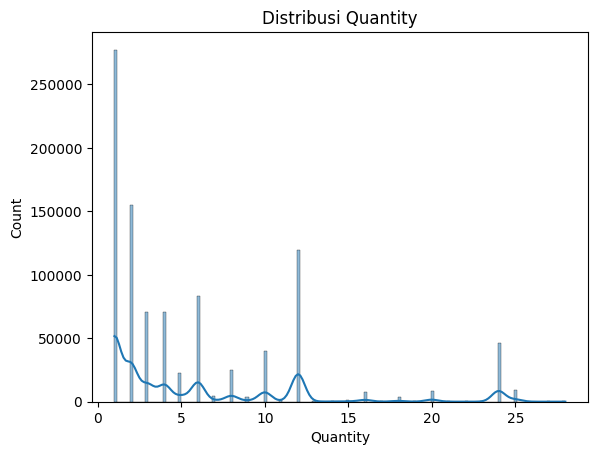

In [ ]:
sns.histplot(df['Quantity'], kde=True)
plt.title('Distribusi Quantity')
plt.show()

In [ ]:
df ['Price']

,Price
0,6.95
1,6.75
2,6.75
4,1.25
5,1.65
...,...
1067366,2.10
1067367,4.15
1067368,4.15
1067369,4.95


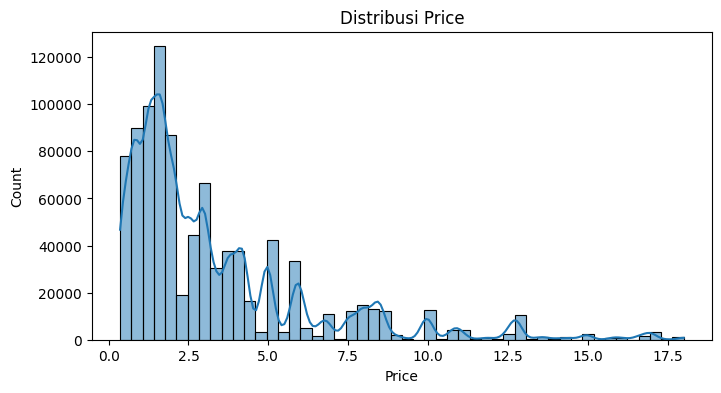

In [ ]:
p1 = df['Price'].quantile(0.01)
p99 = df['Price'].quantile(0.99)

df_no_outliers = df[(df['Price'] >= p1) & (df['Price'] <= p99)]

plt.figure(figsize=(8,4))
sns.histplot(df_no_outliers['Price'], kde=True, bins=50)
plt.title('Distribusi Price')
plt.show()


In [ ]:
df['Country'].value_counts().head(10)

,count
Country,
United Kingdom,883019
EIRE,15362
Germany,15357
France,12685
Spain,3477
Belgium,2928
Switzerland,2748
Portugal,2311
Netherlands,2225


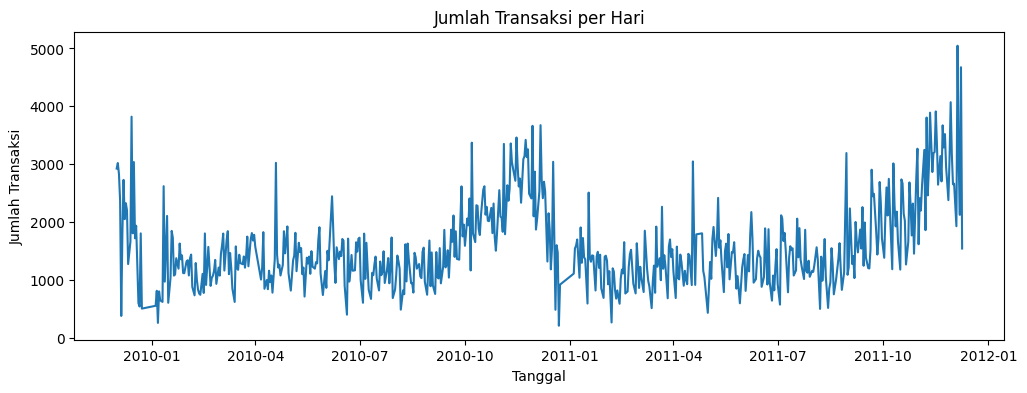

In [ ]:
df['InvoiceDate_only'] = df['InvoiceDate'].dt.date

trans_per_day = df.groupby('InvoiceDate_only').size()

plt.figure(figsize=(12,4))
trans_per_day.plot()
plt.title('Jumlah Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.show()


In [ ]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,29624
ASSORTED COLOUR BIRD ORNAMENT,27697
60 TEATIME FAIRY CAKE CASES,24287
JUMBO BAG RED RETROSPOT,21803
PACK OF 60 PINK PAISLEY CAKE CASES,21758
PACK OF 72 RETROSPOT CAKE CASES,20196
STRAWBERRY CERAMIC TRINKET BOX,18543
PACK OF 72 RETRO SPOT CAKE CASES,17981
REGENCY CAKESTAND 3 TIER,16240


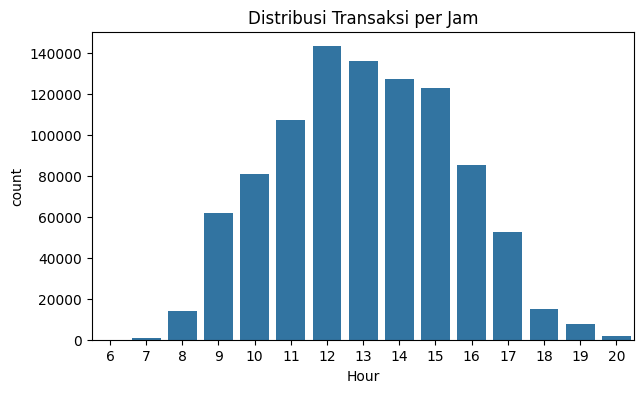

In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour

plt.figure(figsize=(7,4))
sns.countplot(x='Hour', data=df)
plt.title('Distribusi Transaksi per Jam')
plt.show()


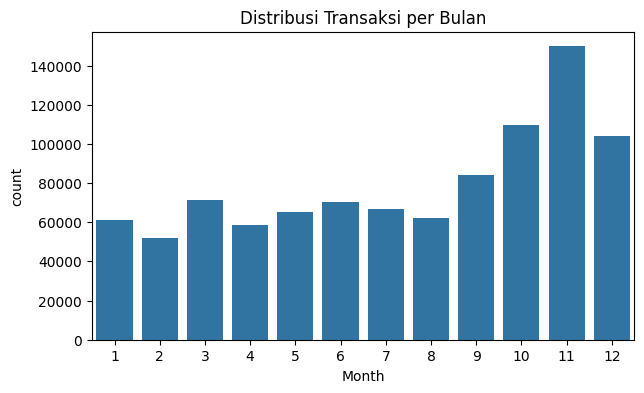

In [ ]:
df['Month'] = df['InvoiceDate'].dt.month

plt.figure(figsize=(7,4))
sns.countplot(x='Month', data=df)
plt.title('Distribusi Transaksi per Bulan')
plt.show()
